# Procesamiento de datos
Fecha: 14 Febrero 2024<br>
Clase: 10

## Indice
1. Repaso: Bag of words
2. Term Frequency Inverse Document Frequency (TF-IDF)
3. Ejercicio

Antes de empezar, importamos los paquetes que vamos a utilizar:

In [1]:
import pandas as pd

## Repaso: Natural language processing

- Regular expressions:

1. Convertir texto a minúsculas
2. Eliminar o convertir números
3. Eliminar la puntuación
4. Eliminar espacios en blanco
5. Reemplazar patrones
6. etc.

- Tokenización <br>
- Eliminar stop words <br>
- Stemming y Lematización 


## Repaso: Bag of words

Para trabajar con lenguaje natural necesitaremos poder traducir el texto a algo que pueda ser entendido por los algoritmos
predictivos, es decir, traducir las unidades de significado (letras, palabras, conjuntos de palabras) a formato numérico.
Si trabajamos con palabras, una primera idea sería asignar a cada palabra un número. A esto se le llama vectorizar y funciona de forma parecida a one-hot encoding.

El modelo bolsa de palabras (o bag-of-words) crea un vector para cada instancia sumando todas las palabras que aparecen en el texto de cada instancia.

Veamos que dice el manual sobre los diferentes parámetros:

- **max_features (= 1500)**: Usando este modelo todas las palabras únicas en cada documento son convertidas en números. Entre todos los documentos, puede haber una gran cantidad de palabras. Pero normalmente, las palabras con una baja frecuencia no suelen ser buenos parámetros para usar en la clasificación. **max_features fija el máximo de palabras distintas que queremos usar, en este caso 1500**.

- **min_df (= 5)**: Corresponde al minimo numero de documentos que debería contener cada feature. Es decir, **solo incluimos las palabras que aparecen al menos en 5 documentos distintos**.

- **max_df (= 0.7)** : Corresponde a un porcentaje. Aquí, 0.7 quiere decir que **incluimos las palabras que aparecen en un máximo del 70% de todos los documentos**. Palabras que aparecen en casi todos los documentos no suelen ser buenas para la clasificacion, ya que no dan ninguna información especial sobre el documento.

- **stop_words**: Previene el uso de palabras que no contienen ninguna información útil. Para ello usamos la librería nltk.corpus.


## Term Frequency Inverse Document Frequency (TF-IDF)

Bag of words (BoW) funciona bien convirtiendo texto a números. Sin embargo tiene el inconveniente de que asigna una puntuación a cada palabra basandose en las veces que aparece en cada documento. **BoW No tiene en cuenta que dicha palabra quizá en un documento aparece muy pocas veces, pero muchas en otros. TFIDF resuelve este problema dividiendo la frecuencia de una palabra en un documento por el inverso de la frecuencia del documento.** TF significa "Term Frequency" y IDF "Inverse Document Frequency".

TF = Número de veces que una palabra aparece / Número total de palabras en el documento.

IDF(palabra) = Log(Numero total de documentos / Número de documentos que contienen cierta palabra)

EL valor TFIDF de una palabra en un documento en particular es mas alto si la frecuencia de la palabra es mas alta en ese documento en concreto, pero mas baja en todos los otros documentos.

Esto es importante por que si una palabra es usada con frecuencia dentro de una clase de texto pero es más inusual en otra clase de texto, puede ser más relevante a la hora de clasificar, por lo que deberíamos darle más peso.

# Continuación del ejercicio: Clasificador de noticias sobre COVID como verdaderas o falsas.


**Ejercicio:** Preparar un dataset de texto para un modelo de clasificación de noticias de COVID en verdaderas o falsas, utilizando los datos recopilados por Susan Li.

https://raw.githubusercontent.com/susanli2016/NLP-with-Python/master/data/corona_fake.csv

Limpiaremos y preprocesaremos los datos de texto, realizaremos la extracción de características usando la biblioteca NLTK, construiremos e implementaremos un clasificador de regresión logística usando la biblioteca Scikit-Learn y evaluaremos la precisión del modelo al final. Compararemos el uso de bag of words y el de TF-IDF.

**Ejercicio de repaso:** Carga el dataset. Unifica los labels a FAKE y TRUE. Elimina todos los registros que tengan el feature text o label como NaN.



In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/susanli2016/NLP-with-Python/master/data/corona_fake.csv')
df.head()

,title,text,source,label
0,Due to the recent outbreak for the Coronavirus...,"You just need to add water, and the drugs and ...",coronavirusmedicalkit.com,Fake
1,NaN,Hydroxychloroquine has been shown to have a 10...,RudyGiuliani,Fake
2,NaN,Fact: Hydroxychloroquine has been shown to hav...,CharlieKirk,Fake
3,NaN,The Corona virus is a man made virus created i...,JoanneWrightForCongress,Fake
4,NaN,Doesn’t @BillGates finance research at the Wuh...,JoanneWrightForCongress,Fake


In [3]:
df['label'] = df['label'].str.upper()
df.head()

,title,text,source,label
0,Due to the recent outbreak for the Coronavirus...,"You just need to add water, and the drugs and ...",coronavirusmedicalkit.com,FAKE
1,NaN,Hydroxychloroquine has been shown to have a 10...,RudyGiuliani,FAKE
2,NaN,Fact: Hydroxychloroquine has been shown to hav...,CharlieKirk,FAKE
3,NaN,The Corona virus is a man made virus created i...,JoanneWrightForCongress,FAKE
4,NaN,Doesn’t @BillGates finance research at the Wuh...,JoanneWrightForCongress,FAKE


In [4]:
data_na = df.dropna()

data_new = data_na.copy()
data_new.head()

,title,text,source,label
0,Due to the recent outbreak for the Coronavirus...,"You just need to add water, and the drugs and ...",coronavirusmedicalkit.com,FAKE
9,Basic protective measures against the new coro...,Stay aware of the latest information on the CO...,https://www.who.int/emergencies/diseases/novel...,TRUE
14,Exposing yourself to the sun or to temperature...,"You can catch COVID-19, no matter how sunny or...",https://www.who.int/emergencies/diseases/novel...,TRUE
16,Being able to hold your breath for 10 seconds ...,The most common symptoms of COVID-19 are dry c...,https://www.who.int/emergencies/diseases/novel...,TRUE
17,Drinking alcohol does not protect you against ...,Frequent or excessive alcohol consumption can ...,https://www.who.int/emergencies/diseases/novel...,TRUE


In [5]:
data_new["title_text"] = data_new["title"] + "_" + data_new["text"]

data_new = data_new[["title_text", "label"]]
data_new.head()

,title_text,label
0,Due to the recent outbreak for the Coronavirus...,FAKE
9,Basic protective measures against the new coro...,TRUE
14,Exposing yourself to the sun or to temperature...,TRUE
16,Being able to hold your breath for 10 seconds ...,TRUE
17,Drinking alcohol does not protect you against ...,TRUE


In [6]:
df['label'].value_counts()

TRUE    584
FAKE    575
Name: label, dtype: int64

**Ejercicio de repaso:** Limpia y preprocesa todos los textos. Presta especial atención a convertir todos los carácteres a minúscula, elimina los tags de html y los simbolos de puntuación. 

In [7]:
import re
def preprocessor(text):
    
    text = re.sub('<[^>]*>', '', text)
    text = re.sub(r'[^\w\s]','', text)
    text = text.lower()
    return text
    
data_new['title_text'] = data_new['title_text'].apply(preprocessor)

data_new.head()

,title_text,label
0,due to the recent outbreak for the coronavirus...,FAKE
9,basic protective measures against the new coro...,TRUE
14,exposing yourself to the sun or to temperature...,TRUE
16,being able to hold your breath for 10 seconds ...,TRUE
17,drinking alcohol does not protect you against ...,TRUE


**Ejercicio de repaso:** Separa los datos en conjunto de entrenamiento y test, con un 70%-30% respectivamente. 

In [8]:
from sklearn.model_selection import train_test_split

X = data_new["title_text"]
y = data_new['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.3, shuffle=False)

In [10]:
X_train.shape, X_test.shape

((741,), (318,))

**Ejercicio** Crea una pipeline que aplique Bag of words como vectorizador (con max_features=100), y usa regresión logistica como modelo. Que métrica podemos usar para ver la eficacia del modelo?

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import StandardScaler

pipeline = Pipeline([('vectorizer', CountVectorizer(max_features=100, stop_words = 'english')),
                    #('scaler', StandardScaler(with_mean=False)),
                    #('modelo', LogisticRegression())])
                    ('modelo', LogisticRegression(max_iter=3000, solver='saga'))])

pipeline

Pipeline(steps=[('vectorizer',
                 CountVectorizer(max_features=100, stop_words='english')),
                ('modelo', LogisticRegression(max_iter=3000, solver='saga'))])

In [16]:
clf = pipeline.fit(X_train, y_train)

In [17]:
clf.score(X_test, y_test)

0.8333333333333334

**Ejercicio** Que impacto tiene max_features? Crea una gráfica en la que se plotee el score del modelo para diferentes valores de este parámetro y así decidir el óptimo. Dibuja dos curvas, una con y otra sin stop_words = 'english'. Mejora?. 

In [ ]:
pipeline = Pipeline([('vectorizer', CountVectorizer(max_features=300, stop_words = 'english')),
                    #('scaler', StandardScaler(with_mean=False)),
                    ('modelo', LogisticRegression(max_iter=3000, solver='saga'))])

clf = pipeline.fit(X_train, y_train)
clf.score(X_test, y_test)

Entrenando con max_features=100 con y sin stop words...


C:\CHARISMA\Conda\envs\ramanchada\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Entrenando con max_features=200 con y sin stop words...


C:\CHARISMA\Conda\envs\ramanchada\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Entrenando con max_features=300 con y sin stop words...


C:\CHARISMA\Conda\envs\ramanchada\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Entrenando con max_features=400 con y sin stop words...


C:\CHARISMA\Conda\envs\ramanchada\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Entrenando con max_features=500 con y sin stop words...


C:\CHARISMA\Conda\envs\ramanchada\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


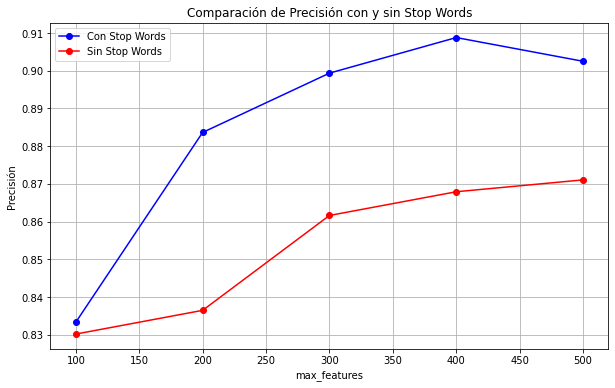

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score

# Define un rango representativo de valores para max_features
max_features_range = np.arange(100, 501, 100)

# Listas para almacenar los resultados
max_features_list = []
accuracy_list_with_sw = []  # Para almacenar precisión con stop words
accuracy_list_without_sw = []  # Para almacenar precisión sin stop words

for max_features in max_features_range:
    print(f"Entrenando con max_features={max_features} con y sin stop words...")
    
    # Pipeline con stop words
    pipeline_with_sw = Pipeline([
        ('vectorizer', CountVectorizer(max_features=max_features, stop_words='english')),
        ('modelo', LogisticRegression(max_iter=3000, solver='saga'))
    ])
    
    # Pipeline sin stop words
    pipeline_without_sw = Pipeline([
        ('vectorizer', CountVectorizer(max_features=max_features, stop_words=None)),
        ('modelo', LogisticRegression(max_iter=3000, solver='saga'))
    ])
    
    # Entrenar y evaluar con stop words
    clf_with_sw = pipeline_with_sw.fit(X_train, y_train)
    score_with_sw = clf_with_sw.score(X_test, y_test)
    
    # Entrenar y evaluar sin stop words
    clf_without_sw = pipeline_without_sw.fit(X_train, y_train)
    score_without_sw = clf_without_sw.score(X_test, y_test)
    
    # Guardar los resultados
    max_features_list.append(max_features)
    accuracy_list_with_sw.append(score_with_sw)
    accuracy_list_without_sw.append(score_without_sw)

# Graficar los resultados
plt.figure(figsize=(10, 6))
plt.plot(max_features_list, accuracy_list_with_sw, marker='o', linestyle='-', color='b', label='Con Stop Words')
plt.plot(max_features_list, accuracy_list_without_sw, marker='o', linestyle='-', color='r', label='Sin Stop Words')
plt.title('Comparación de Precisión con y sin Stop Words')
plt.xlabel('max_features')
plt.ylabel('Precisión')
plt.legend()
plt.grid(True)
plt.show()


**Ejercicio** Repite el ejercicio anterior usando el scaler que te funcione mejor. Sigue usando pipeline.

In [ ]:
pipeline = Pipeline([('vectorizer', CountVectorizer(max_features=300, stop_words = 'english')),
                    ('scaler', StandardScaler(with_mean=False)),
                    ('modelo', LogisticRegression())])

clf = pipeline.fit(X_train, y_train)
clf.score(X_test, y_test)

Entrenando con max_features=100 con diferentes configuraciones...
Precisión con NoScaler: 0.8333333333333334
Precisión con MaxAbsScaler: 0.7012578616352201
Precisión con StandardScaler: 0.8238993710691824
Entrenando con max_features=200 con diferentes configuraciones...
Precisión con NoScaler: 0.8836477987421384
Precisión con MaxAbsScaler: 0.6918238993710691
Precisión con StandardScaler: 0.8710691823899371
Entrenando con max_features=300 con diferentes configuraciones...
Precisión con NoScaler: 0.89937106918239
Precisión con MaxAbsScaler: 0.710691823899371
Precisión con StandardScaler: 0.8710691823899371
Entrenando con max_features=400 con diferentes configuraciones...
Precisión con NoScaler: 0.9088050314465409
Precisión con MaxAbsScaler: 0.7264150943396226
Precisión con StandardScaler: 0.8930817610062893
Entrenando con max_features=500 con diferentes configuraciones...
Precisión con NoScaler: 0.9056603773584906
Precisión con MaxAbsScaler: 0.7075471698113207
Precisión con StandardScale

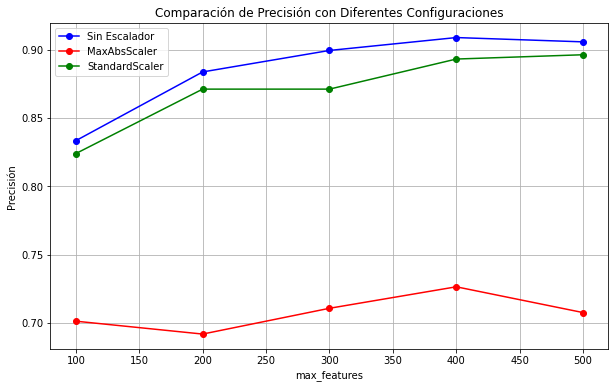

In [19]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import StandardScaler, MaxAbsScaler
import numpy as np
import matplotlib.pyplot as plt

# Define un rango representativo de valores para max_features
max_features_range = np.arange(100, 501, 100)

# Lista para almacenar los resultados
max_features_list = []
accuracy_list_maxabs = []
accuracy_list_standard = []
accuracy_list_no_scaler = []  # Lista para precisión sin escalador

for max_features in max_features_range:
    print(f"Entrenando con max_features={max_features} con diferentes configuraciones...")

    # Pipelines con diferentes configuraciones
    pipelines = {
        'NoScaler': make_pipeline(CountVectorizer(max_features=max_features, stop_words='english'), LogisticRegression(max_iter=3000, solver='saga')),
        'MaxAbsScaler': make_pipeline(CountVectorizer(max_features=max_features, stop_words='english'), MaxAbsScaler(), LogisticRegression(max_iter=3000, solver='saga')),
        'StandardScaler': make_pipeline(CountVectorizer(max_features=max_features, stop_words='english'), StandardScaler(with_mean=False), LogisticRegression(max_iter=3000, solver='saga')),
    }

    # Entrenar y evaluar cada pipeline
    for config_name, pipeline in pipelines.items():
        clf = pipeline.fit(X_train, y_train)
        score = clf.score(X_test, y_test)
        print(f"Precisión con {config_name}: {score}")
        
        # Guardar la precisión en la lista correspondiente
        if config_name == 'NoScaler':
            accuracy_list_no_scaler.append(score)
        elif config_name == 'MaxAbsScaler':
            accuracy_list_maxabs.append(score)
        elif config_name == 'StandardScaler':
            accuracy_list_standard.append(score)

    max_features_list.append(max_features)

# Graficar los resultados
plt.figure(figsize=(10, 6))
plt.plot(max_features_list, accuracy_list_no_scaler, marker='o', linestyle='-', color='b', label='Sin Escalador')
plt.plot(max_features_list, accuracy_list_maxabs, marker='o', linestyle='-', color='r', label='MaxAbsScaler')
plt.plot(max_features_list, accuracy_list_standard, marker='o', linestyle='-', color='g', label='StandardScaler')
plt.title('Comparación de Precisión con Diferentes Configuraciones')
plt.xlabel('max_features')
plt.ylabel('Precisión')
plt.legend()
plt.grid(True)
plt.show()


**Ejercicio** Esta vez usa tfidf como vectorizador en tu pipeline. Prueba a usar las dos normalizaciones l1 y l2.

https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(strip_accents=None,
                        lowercase=False,
                        preprocessor=None,
                        #tokenizer=tokenizer_porter,
                        use_idf=True,
                        norm='l2',
                        smooth_idf=True)

pipeline = Pipeline([('vectorizer', tfidf),
                    ('scaler', StandardScaler(with_mean=False)),
                    ('modelo', LogisticRegression())])

clf = pipeline.fit(X_train, y_train)
clf.score(X_test, y_test)

0.8710691823899371

In [21]:
tfidf = TfidfVectorizer(strip_accents=None,
                        lowercase=False,
                        preprocessor=None,
                        #tokenizer=tokenizer_porter,
                        use_idf=True,
                        norm='l1',
                        smooth_idf=True)

pipeline = Pipeline([('vectorizer', tfidf),
                    ('scaler', StandardScaler(with_mean=False)),
                    ('modelo', LogisticRegression())])

clf = pipeline.fit(X_train, y_train)
clf.score(X_test, y_test)

0.889937106918239

In [22]:
tfidf = TfidfVectorizer(strip_accents=None,
                        lowercase=False,
                        stop_words = 'english',
                        preprocessor=None,
                        #tokenizer=tokenizer_porter,
                        use_idf=True,
                        norm='l2',
                        smooth_idf=True)

pipeline = Pipeline([('vectorizer', tfidf),
                    ('scaler', StandardScaler(with_mean=False)),
                    ('modelo', LogisticRegression())])

clf = pipeline.fit(X_train, y_train)
clf.score(X_test, y_test)

0.839622641509434

**Ejercicio** Que hacen use_idf y smooth_idf? Resultan en un mejor funcionamiento del modelo?

**Ejercicio** Queremos saber las palabras que tienen un mayor/menor coeficiente tfidf, para entender que palabras tienen mayor importancia a la hora de trabajar con nuestro modelo de clasificación. Puedes seguir los siguientes pasos: Crea un dataframe con dos columnas: coeficientes y palabras, obteniendolas a partir de pipeline.named_steps['nombre de tu modelo'] y pipeline.named_steps['nombre de tu vectorizador']. Que falta para obtener los nombres y coeficientes? Una vez tengas este df, ordenalo por el coeficiente y muestra las cinco primeras y últimas palabras.

In [23]:
coeficientes = pipeline.named_steps['modelo'].coef_[0]
palabras = pipeline.named_steps['vectorizer'].get_feature_names_out()

df_coeffs = pd.DataFrame({'words':palabras, 'coeff': coeficientes})


In [24]:
df_coeffs.sort_values(by='coeff', ascending=False).head()


,words,coeff
20890,protect,0.066495
13220,identified,0.065422
22207,respiratory,0.058170
8297,disease,0.057008
470,2019_coronavirus,0.055627


In [25]:
df_coeffs.sort_values(by='coeff', ascending=False).tail()

,words,coeff
18646,originate,-0.076316
8840,drips,-0.079570
5141,china_high,-0.079570
2032,alters,-0.084839
19679,petition_5g,-0.087373


## N-grams

Los N-gramas son secuencias de N palabras consecutivas que aparecen en un texto. Estas secuencias de palabras pueden solaparse con secuencias anteriores o posteriores. En procesamiento de lenguaje natural, utilizar los N-gramas (normalmente 2-gramas o 3-gramas) como tokens en vez de (o a la vez que) palabras individuales nos puede ayudar a entender mejor el contexto y significado de las palabras.

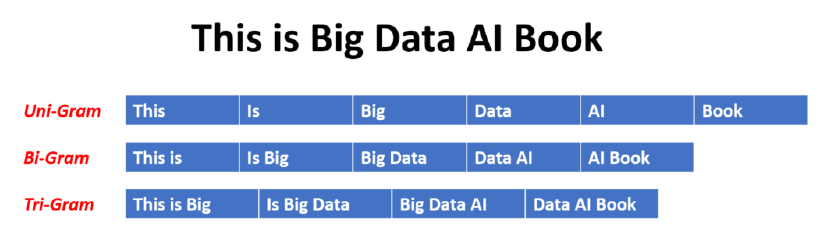

Es sencillo implementar estos modelos en Python, ya sea utilizando la clase
CountVectorizer (que usamos para la bolsa de palabras) o la TfidfVectorizer (que
usamos para los vectores TF-IDF). En ambos casos deberemos especificar la vavriable ngram_range= (límite inferior,
límite superior).

**Ejercicio** Compara con el ejercicio anterior que diese mejor resultado. Prueba diferentes rangos de n-gramas. Como en el ejercicio anterior, busca las palabras con coeficientes mas altos y mas bajos. Hay alguna diferencia?

In [29]:
tfidf = TfidfVectorizer(strip_accents=None,
                        lowercase=False,
                        stop_words = 'english',
                        preprocessor=None,
                        #tokenizer=tokenizer_porter,
                        use_idf=True,
                        norm='l2',
                        smooth_idf=True,
                        ngram_range = (2,4))

pipeline = Pipeline([('vectorizer', tfidf),
                    ('scaler', StandardScaler(with_mean=False)),
                    ('modelo', LogisticRegression())])

clf = pipeline.fit(X_train, y_train)
clf.score(X_test, y_test)

0.7012578616352201

In [30]:
coeficientes = pipeline.named_steps['modelo'].coef_[0]
palabras = pipeline.named_steps['vectorizer'].get_feature_names_out()

df_coeffs = pd.DataFrame({'words':palabras, 'coeff': coeficientes})


In [32]:
df_coeffs.sort_values(by='coeff', ascending=True).head()


,words,coeff
190361,effective stopping,-0.014074
598180,update did,-0.013179
165532,did virus originate,-0.013179
518333,shocking update did virus,-0.013179
598181,update did virus,-0.013179


In [41]:
tfidf = TfidfVectorizer(strip_accents=None,
                        lowercase=False,
                        max_df = 100,
                        #stop_words = 'english',
                        #stop_words = ['was', 'china_high', 'drips', 'alters', 'petition_5g'],
                        preprocessor=None,
                        #tokenizer=tokenizer_porter,
                        use_idf=True,
                        norm='l2',
                        smooth_idf=True)

pipeline = Pipeline([('vectorizer', tfidf),
                    ('scaler', StandardScaler(with_mean=False)),
                    ('modelo', LogisticRegression())])

clf = pipeline.fit(X_train, y_train)
clf.score(X_test, y_test)

0.7955974842767296

In [46]:
coeficientes = pipeline.named_steps['modelo'].coef_[0]
palabras = pipeline.named_steps['vectorizer'].get_feature_names_out()

df_coeffs = pd.DataFrame({'words':palabras, 'coeff': coeficientes})

df_coeffs.sort_values(by='coeff', ascending=False).head(20)

,words,coeff
12939,hubei,0.070788
24639,starting,0.066209
28787,works,0.061189
4159,breathing,0.052160
20886,province,0.051515
6802,covid19_covid19,0.050220
5625,coinfection,0.048763
17735,newly,0.048196
2293,antibiotics,0.048042
16747,mild,0.047523


In [45]:
tfidf = TfidfVectorizer(strip_accents=None,
                        lowercase=False,
                        max_df = 100,
                        #stop_words = 'english',
                        # stop_words = ['originate' ,'china_high', 'drips', 'alters', 'petition_5g'],
                        stop_words = ['identified' ,'specific', 'coronavirus_no', '2019_coronavirus', 'available_no'],
                        preprocessor=None,
                        #tokenizer=tokenizer_porter,
                        use_idf=True,
                        norm='l2',
                        smooth_idf=True)

pipeline = Pipeline([('vectorizer', tfidf),
                    ('scaler', StandardScaler(with_mean=False)),
                    ('modelo', LogisticRegression())])

clf = pipeline.fit(X_train, y_train)
clf.score(X_test, y_test)

0.789308176100629

In [50]:
df_coeffs.sort_values(by='coeff', ascending=True).head(20)#['words']

,words,coeff
18583,originate,-0.095981
19615,petition_5g,-0.093580
5132,china_high,-0.093180
8798,drips,-0.093180
2028,alters,-0.090845
18584,originated,-0.089535
23628,shocking,-0.086783
18288,officially,-0.081691
27342,update,-0.081407
2108,amounts,-0.081165
